In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Influence des differentes valeurs du CRF sur la compression et la qualité d'une video .mp4

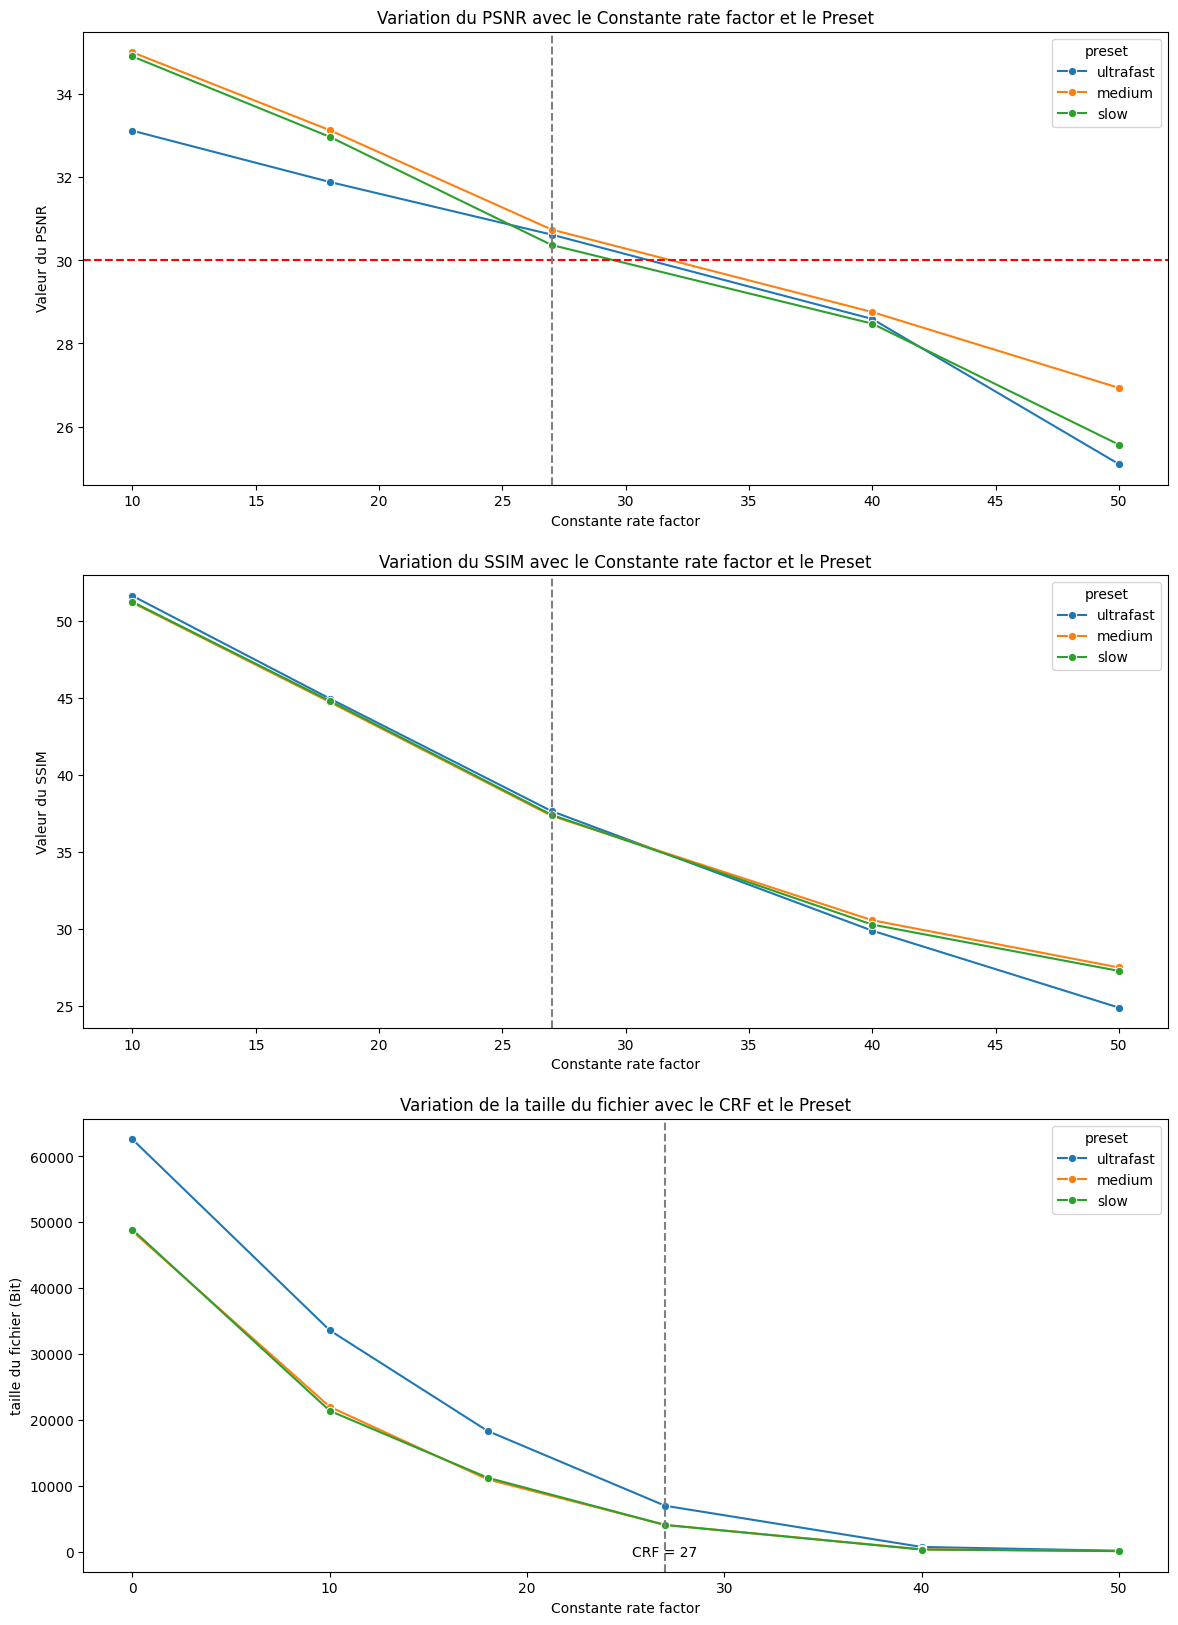

In [47]:
# Charger les données
df_crf = pd.read_csv('ffmpeg_tests_results_crf_totoro.csv')

# Extraire les valeurs numériques pour PSNR et SSIM
# df_crf['psnr_value'] = df_crf['psnr'].str.extract('(\d+\.\d+)').astype(float)
df_crf['psnr_dB'] = df_crf['psnr'].str.extract('\((\d+\.\d+)').astype(float)
df_crf['ssim_value'] = df_crf['ssim'].str.extract('(\d+\.\d+)').astype(float)

threshold = 30
crf_value = 27

# Tracer le PSNR
plt.figure(figsize=(14, 20))
plt.subplot(3, 1, 1)
sns.lineplot(data=df_crf, x='Constante rate factor', y='psnr_dB', hue='preset', marker='o')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title('Variation du PSNR avec le Constante rate factor et le Preset')
plt.ylabel('Valeur du PSNR')

# Ajouter une ligne verticale
plt.axvline(x=crf_value, color='gray', linestyle='--')


# Tracer le SSIM
plt.subplot(3, 1, 2)
sns.lineplot(data=df_crf, x='Constante rate factor', y='ssim_value', hue='preset', marker='o')
plt.title('Variation du SSIM avec le Constante rate factor et le Preset')
plt.ylabel('Valeur du SSIM')
#ligne verticale
plt.axvline(x=crf_value, color='gray', linestyle='--')


# filesize vs GOP
plt.subplot(3, 1, 3)
sns.lineplot(data=df_crf, x='Constante rate factor', y='file_size', hue='preset', marker='o')
plt.title('Variation de la taille du fichier avec le CRF et le Preset')
plt.ylabel('taille du fichier (Bit)')

# Ajouter une ligne verticale
plt.axvline(x=crf_value, color='gray', linestyle='--')

# Afficher la valeur du CRF au-dessus de la ligne
plt.text(crf_value, 1.02, f'CRF = {crf_value}', ha='center', va='center')

plt.show()

<div>
    <p>Video normal</p>
    <video>
        <source src="test/totoro_vf.mp4" type="video/mp4" />
    </video>
</div>

<div style='display: flex; margin-top:100px'>
    <div>
        <p> <b>CRF =</b> 18 | <b>Preset :</b> medium</p>
        <video>
            <source src="encoded_videos_crf_totoro/output_18_medium.mp4" type="video/mp4" />
        </video>
    </div>
    <div style="margin-left: 10px">
        <p> <b>CRF =</b> 18 | <b>Preset :</b> slow</p>
        <video>
            <source src="encoded_videos_crf_totoro/output_18_slow.mp4" type="video/mp4" />
        </video>
    </div>
</div>

<div style='display: flex; margin-top:50px'>
    <div>
        <p> <b>CRF =</b> 27 | <b>Preset :</b> medium</p>
        <video>
            <source src="encoded_videos_crf_totoro/output_27_medium.mp4" type="video/mp4" />
        </video>
    </div>
    <div style="margin-left: 10px">
        <p> <b>CRF =</b> 27 | <b>Preset :</b> slow</p>
        <video>
            <source src="encoded_videos_crf_totoro/output_27_slow.mp4" type="video/mp4" />
        </video>
    </div>
</div>

Les graphiques ci-dessus montrent la variation du PSNR, du SSIM et de la taille du fichier en fonction du facteur de débit constant (Constante rate factor) pour différents réglages (presets).

Voici quelques observations:

**PSNR:**

Pour un facteur de débit constant de 0, le PSNR semble être le maximum (égal à 1.0), indiquant potentiellement aucune perte de qualité.
Le PSNR diminue généralement avec l'augmentation du facteur de débit constant. C'est attendu car une augmentation du facteur de débit constant signifie généralement une réduction de la qualité de la vidéo. La taille du fichier diminue aussi avec le CRF (pour les 3 preset). Ce qui etait attendu. En effet une augmentation du CRF signifie une plus grosse compression.
Les différents réglages (presets) montrent des comportements similaires, bien qu'il puisse y avoir des différences mineures entre eux.

En considérant qu'un psnr entre 30-40dB, la qualité visuel de la video n'est pas trop degradée. On remarque que pour un CRF de 27, les 3 preset sont acceptables (au niveau qualité) et la taille du fichier passe en dessous de 10kB

**SSIM:**

Tout comme le PSNR, le SSIM semble être le plus élevé (ou maximum) pour un facteur de débit constant de 0.
Le SSIM diminue également avec l'augmentation du facteur de débit constant.
Les différents réglages (presets) montrent également des comportements similaires en ce qui concerne le SSIM.
Globalement, ces graphiques confirment que l'augmentation du facteur de débit constant entraîne une diminution de la qualité de la vidéo, comme indiqué par les valeurs PSNR et SSIM. Les différents réglages (presets) semblent avoir un impact similaire sur la qualité, bien que des analyses plus approfondies puissent être nécessaires pour distinguer les différences mineures entre eux.

# Influence du GOP sur la qualité et la compression d'une video .mp4

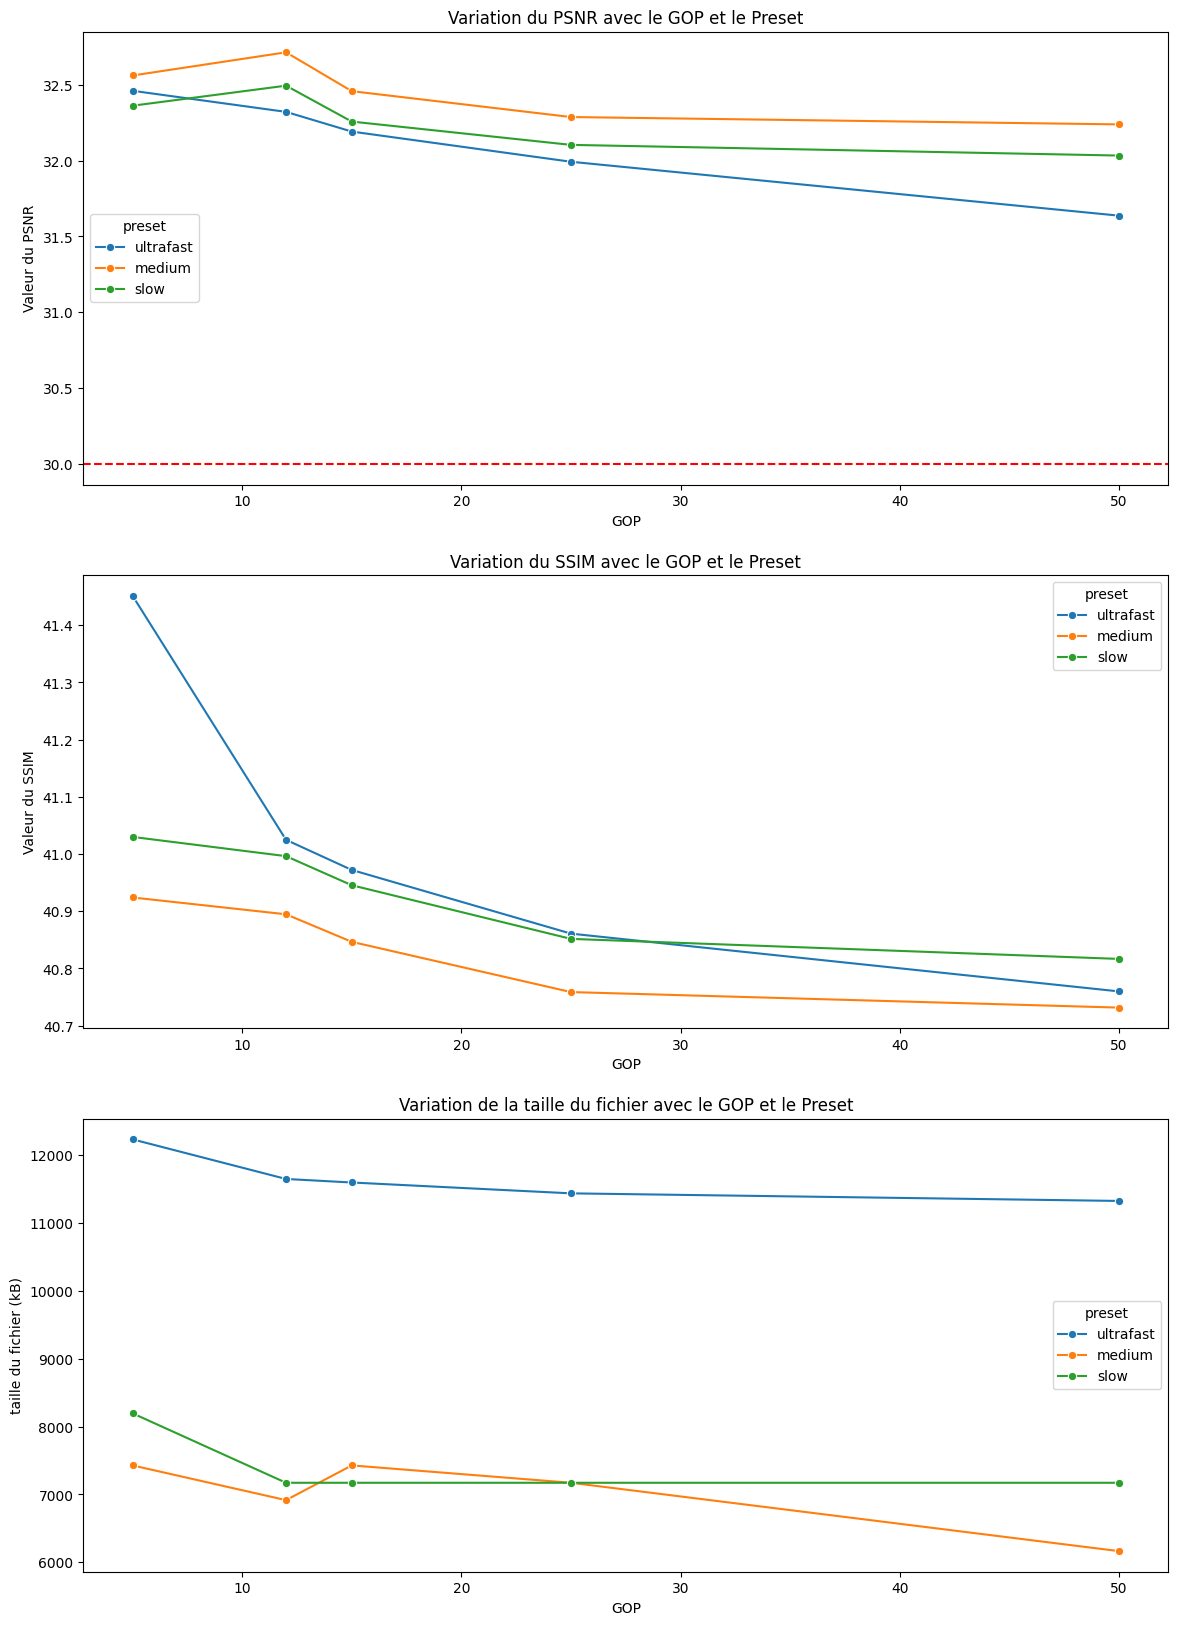

In [28]:
# Charger les données
df_gop = pd.read_csv('ffmpeg_tests_results_gop_totoro.csv')

# Extraire les valeurs numériques pour PSNR et SSIM
df_gop['psnr_dB'] = df_gop['psnr'].str.extract('\((\d+\.\d+)').astype(float)
df_gop['ssim_value'] = df_gop['ssim'].str.extract('(\d+\.\d+)').astype(float)

threshold = 30

# Tracer le PSNR
plt.figure(figsize=(14, 20))
plt.subplot(3, 1, 1)
sns.lineplot(data=df_gop, x='GOP', y='psnr_dB', hue='preset', marker='o')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title('Variation du PSNR avec le GOP et le Preset')
plt.ylabel('Valeur du PSNR')

# Tracer le SSIM
plt.subplot(3, 1, 2)
sns.lineplot(data=df_gop, x='GOP', y='ssim_value', hue='preset', marker='o')
plt.title('Variation du SSIM avec le GOP et le Preset')
plt.ylabel('Valeur du SSIM')

# filesize vs GOP
plt.subplot(3, 1, 3)
sns.lineplot(data=df_gop, x='GOP', y='file_size', hue='preset', marker='o')
plt.title('Variation de la taille du fichier avec le GOP et le Preset')
plt.ylabel('taille du fichier (kB)')
plt.show()




# Influence du tune sur une video mp4


<div style='display: flex; margin-top:100px'>
    <div>
        <p> <b>tune =</b> animation | <b>Preset :</b> medium</p>
        <video>
            <source src="encoded_videos_tune_totoro/output_animation_medium.mp4" type="video/mp4" />
        </video>
    </div>
    <div style="margin-left: 10px">
        <p> <b>tune =</b> film | <b>Preset :</b> medium</p>
        <video>
            <source src="encoded_videos_tune_totoro/output_film_medium.mp4" type="video/mp4" />
        </video>
    </div>
</div>

<div style='display: flex; margin-top:50px'>
    <div>
        <p> <b>tune =</b> grain | <b>Preset :</b> medium</p>
        <video>
            <source src="encoded_videos_tune_totoro/output_grain_medium.mp4" type="video/mp4" />
        </video>
    </div>
    <div style="margin-left: 10px">
        <p> <b>tune =</b> stillimage | <b>Preset :</b> medium</p>
        <video>
            <source src="encoded_videos_tune_totoro/output_stillimage_medium.mp4" type="video/mp4" />
        </video>
    </div>
</div>

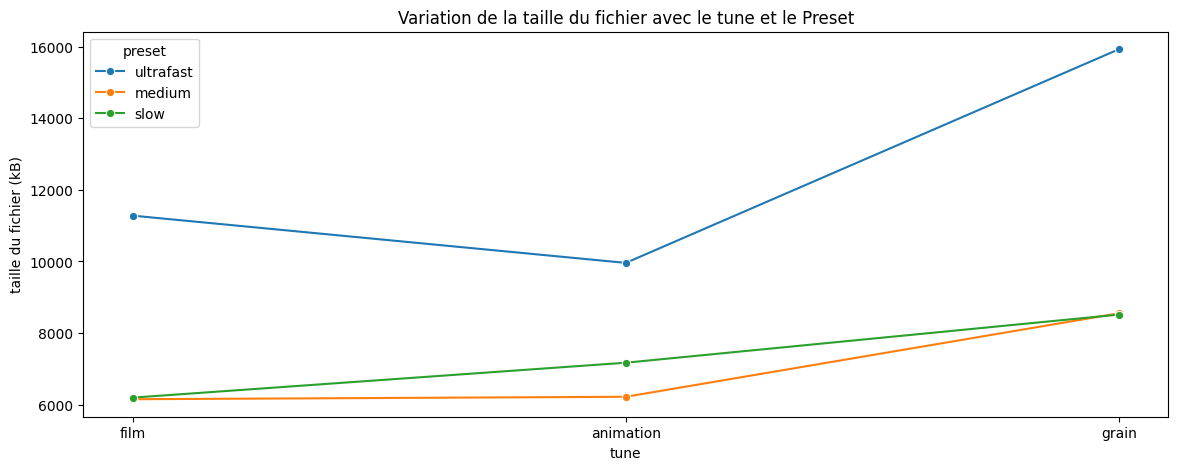

In [58]:
# Charger les données
df_tune = pd.read_csv('ffmpeg_tests_results_tune_totoro.csv')

# filesize vs tune


plt.figure(figsize=(14, 5))
sns.lineplot(data=df_tune, x='tune', y='file_size', hue='preset', marker='o')
plt.title('Variation de la taille du fichier avec le tune et le Preset')
plt.ylabel('taille du fichier (kB)')
plt.show()